# Part 2: Segmentation

In this notebook, we will look at some basic classical (non-machine-learning) methods to partition an image into objects of interest.

In [1]:
import os
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 200

In [2]:
import skimage as sk
import skimage.filters as skf
import skimage.measure as skm
import skimage.morphology as sku

## 1. Data loading

We will work with images from the BBBC datasets considered in notebook 1 - Handling Image Data. For each dataset, we will consider examples of an "easier" segmentation problem. The "harder" samples should be left aside for now and until section 5.

**1.1** Using what you learned in notebook 1 - Handling Image Data, load the following image files:
- data/Part 2/BBBC010/easier.tif
- data/Part 2/BBBC010/harder.tif
- data/Part 2/BBBC020/easier.tif
- data/Part 2/BBBC020/harder.tif

In [3]:
# BBBC010
bbbc010_easy = imageio.imread('data/Part 2/BBBC010/easier.tif')
bbbc010_easy = sk.img_as_float(bbbc010_easy)

bbbc010_hard = imageio.imread('data/Part 2/BBBC010/harder.tif')
bbbc010_hard = sk.img_as_float(bbbc010_hard)

# BBBC020
bbbc020_easy = imageio.imread('data/Part 2/BBBC020/easier.tif')
bbbc020_easy = sk.img_as_float(bbbc020_easy)

bbbc020_hard = imageio.imread('data/Part 2/BBBC020/harder.tif')
bbbc020_hard = sk.img_as_float(bbbc020_hard)

**1.2** Using what you learned in notebook 1 - Handling Image Data, vizualize the images you will be working with.

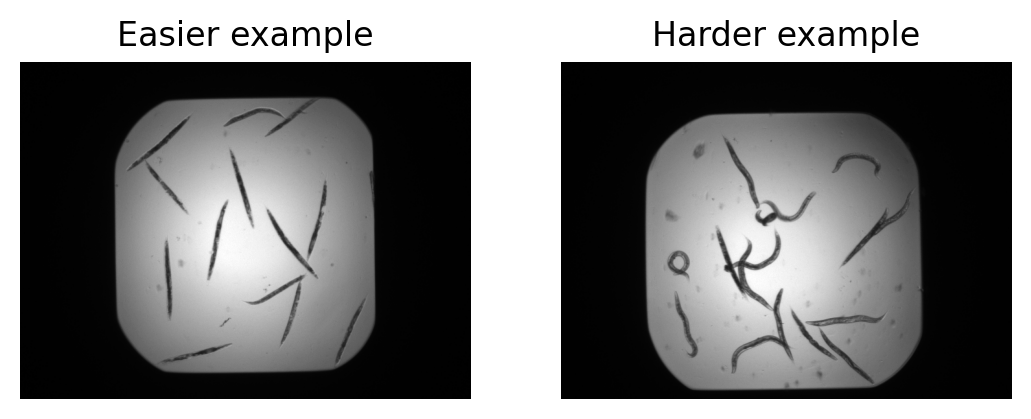

In [4]:
# BBBC010
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(bbbc010_easy, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Easier example')

axes[1].imshow(bbbc010_hard, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Harder example')

plt.show()

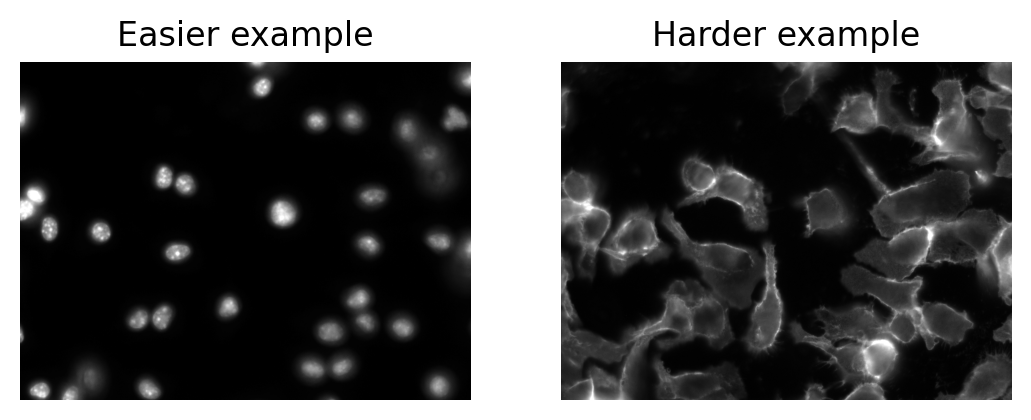

In [5]:
# BBBC020
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(bbbc020_easy, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Easier example')

axes[1].imshow(bbbc020_hard, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Harder example')

plt.show()

## 2. Semantic segmentation

As a first step, we will attempt to group pixels into two broad "background" (containing no relevant information) and "foreground" (containing the objects of interest) categories. This is referred to as *semantic segmentation*.

**2.1** The simplest way to segment an image is to identify a cutoff value that separates pixels belonging to the background and foreground. This is referred to as *thresholding*. To help us find a threshold value, observe the  histogram of the BBBC020 image obtained by running the code below.

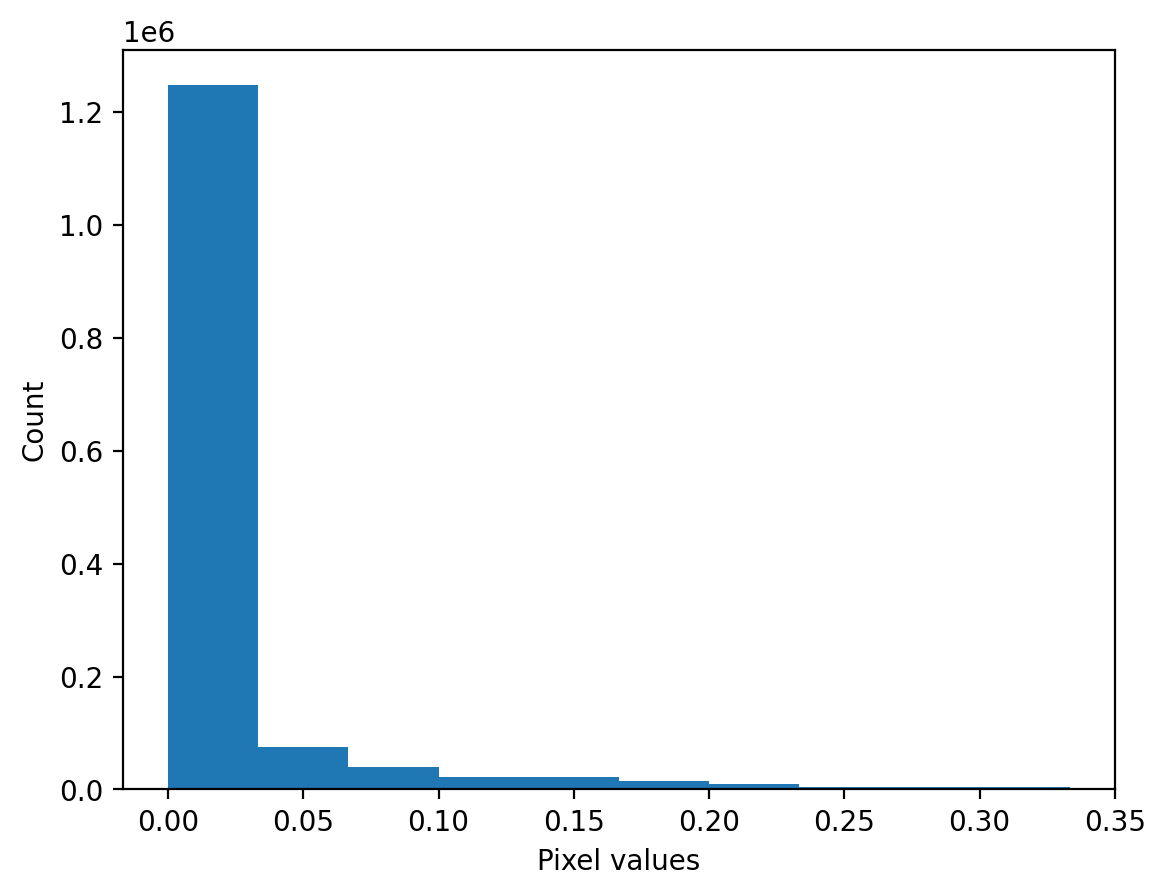

In [6]:
# Plot histogram
plt.hist(bbbc020_easy.ravel())
plt.xlabel("Pixel values")
plt.ylabel("Count")
plt.show()

**2.2** Based on the histogram, choose a threshold value. Then, complete the code below to retreive all pixels with values larger or equal than this threshold. The resulting binary image is referred to as a *mask*.

In [7]:
# Set threshold 
thresh = 0.10

# Retreive values larger or equal
mask_img = bbbc020_easy > thresh

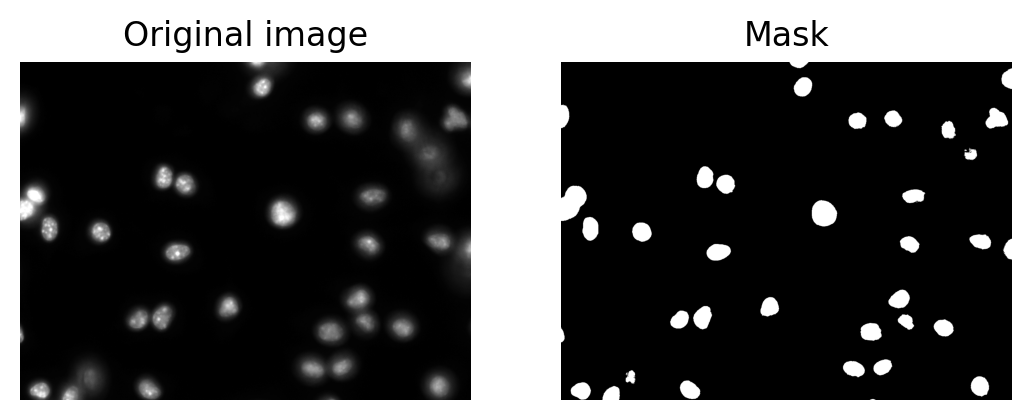

In [8]:
# Visualize the result
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(bbbc020_easy, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original image')

axes[1].imshow(mask_img, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Mask')

plt.show()

**2.3** The process of finding a threshold value can be automated. Several methods are available to automatically retreive a threshold value, but since they are based on different criteria this value may differ. Try out a few automated thresholding algorithms such as threshold_otsu, threshold_mean, and threshold_minimum from https://scikit-image.org/docs/dev/api/skimage.filters.html. Do you see any difference? How does it compare to what you obtained by thresholding manually? 

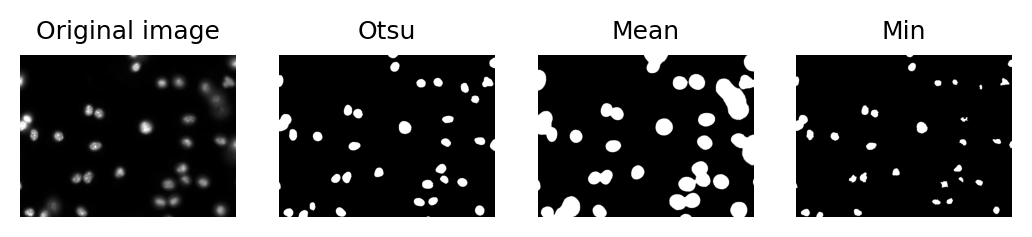

In [9]:
original_img = bbbc020_easy

# Otsu's threshold
thresh_otsu = skf.threshold_otsu(bbbc020_easy)
mask_otsu = original_img > thresh_otsu

# Mean threshold
thresh_mean = skf.threshold_mean(bbbc020_easy)
mask_mean = original_img > thresh_mean

# Minimum threshold
thresh_min = skf.threshold_minimum(bbbc020_easy)
mask_min = original_img > thresh_min

# Visualize the result
fig, axes = plt.subplots(nrows=1, ncols=4)

axes[0].imshow(original_img, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original image', fontsize=9)

axes[1].imshow(mask_otsu, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Otsu', fontsize=9)

axes[2].imshow(mask_mean, cmap='gray')
axes[2].axis('off')
axes[2].set_title('Mean', fontsize=9)

axes[3].imshow(mask_min, cmap='gray')
axes[3].axis('off')
axes[3].set_title('Min', fontsize=9)

plt.show()

**2.4** If you did not find it in 2.3 already, note that scikit-image provides a try_all_threshold function that does extractly what its name implies. Run it and observe the result. According to you, which method provides the best results? Why?

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


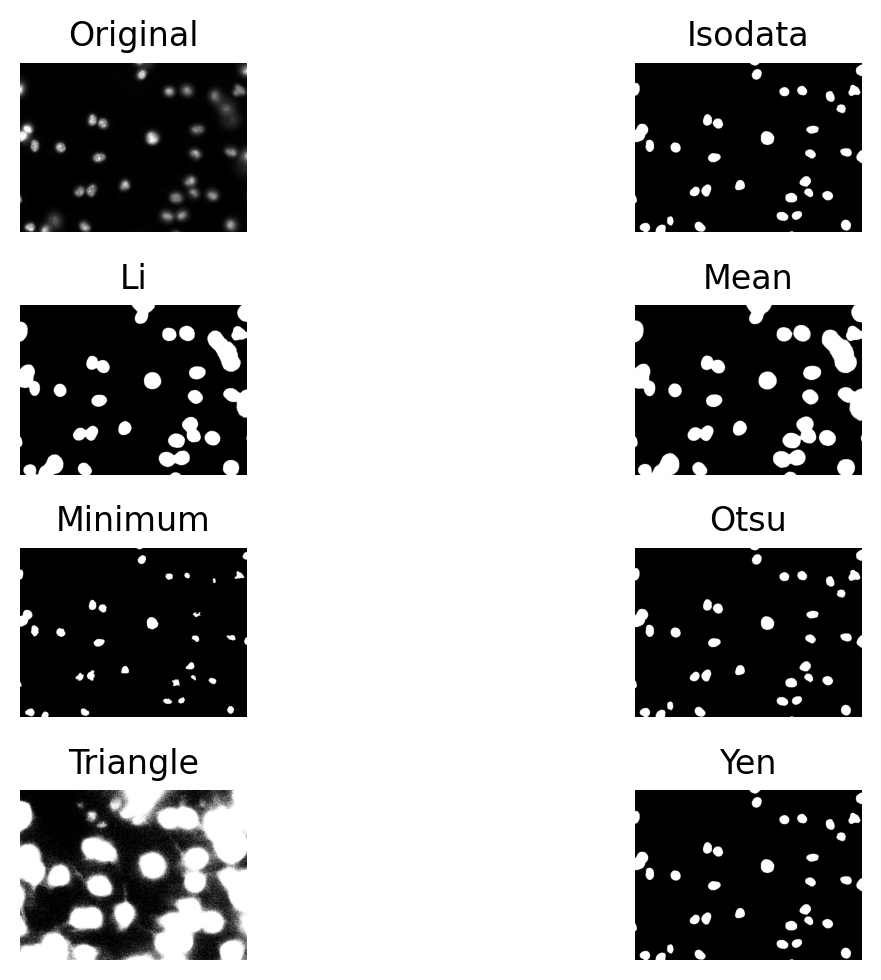

In [10]:
fig, ax = skf.try_all_threshold(bbbc020_easy)
plt.show()

## 3. Instance segmentation

Now that we've identified which parts of the image belong to foreground, we may want to separate it into individual objects. This is referred to as *instance segmentation*.

**3.1** Individual object instances can be retreived by assigning an identical value to foreground pixels that are physically connected, a method referred to as *connected component labeling* (https://en.wikipedia.org/wiki/Connected-component_labeling). Pick you favourite thresholding method and complete the code below to see the result of connected component labeling on the mask of BBBC020. 

*Bonus:* one important parameters of connected component labeling is the definition of connectivity, which can be adapted in the label function below. How does the end result differ? Do you understand why?

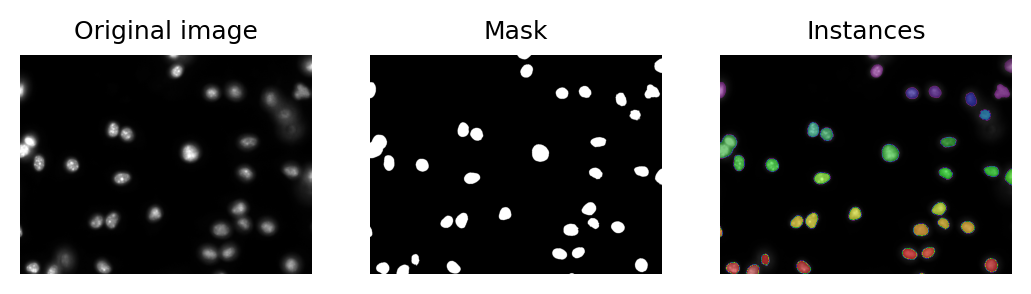

In [11]:
original_img = bbbc020_easy

# Threshold
thresh = skf.threshold_otsu(original_img)
mask_img = original_img > thresh

# Save this semantic mask for later
bbbc020_easy_sem_mask = mask_img

# Label connected components
instance_labels = skm.label(mask_img, background=0, connectivity=2)

# Save this instance mask for later
bbbc020_easy_inst_mask = instance_labels

# Visualize the result
fig, axes = plt.subplots(nrows=1, ncols=3)

axes[0].imshow(bbbc020_easy, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original image', fontsize=9)

axes[1].imshow(mask_img, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Mask', fontsize=9)

axes[2].imshow(bbbc020_easy, cmap='gray')
axes[2].imshow(instance_labels, cmap='nipy_spectral', alpha=.5)
axes[2].axis('off')
axes[2].set_title('Instances', fontsize=9)

plt.show()

**3.2** Alternatively to instance masks, individual objects can also be described by the contour of the area they occupy.  Pick you favourite thresholding method and complete the code below to see the result of an automated contour-finding algorithm (marching squares, https://en.wikipedia.org/wiki/Marching_squares) on the mask of BBBC020. Observe the result carefully: what do you notice? Where do you think this is coming from?

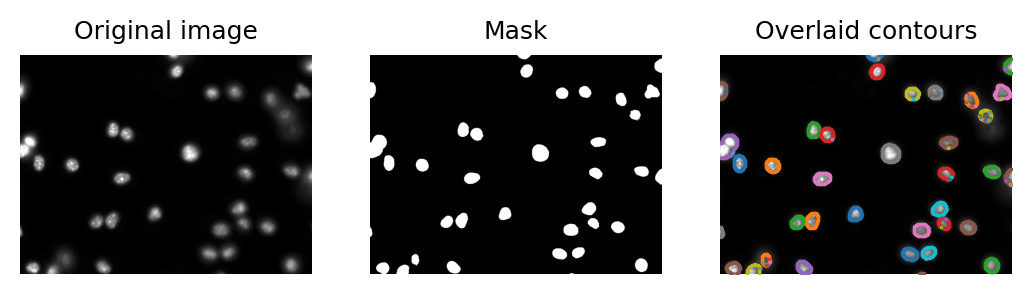

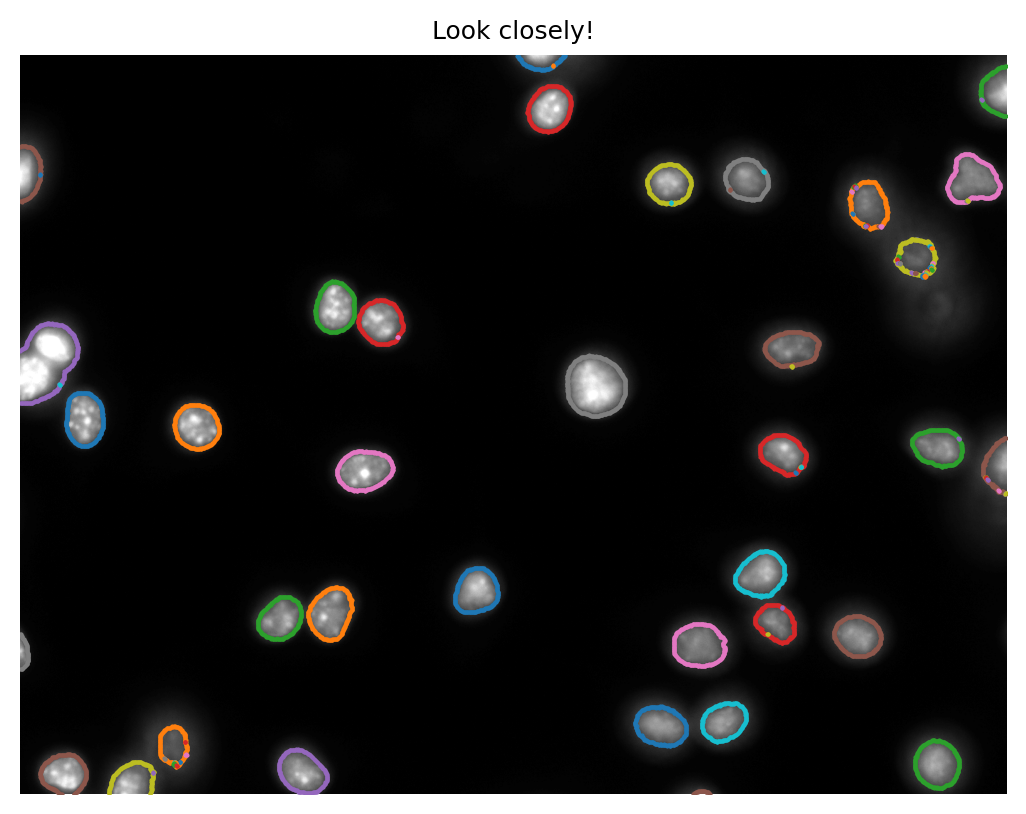

In [12]:
original_img = bbbc020_easy

# Threshold
thresh = skf.threshold_otsu(original_img)
mask_img = original_img > thresh

# Extract contours
contours = skm.find_contours(mask_img, level=0)

# Visualize the result
fig, axes = plt.subplots(nrows=1, ncols=3)

axes[0].imshow(original_img, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original image', fontsize=9)

axes[1].imshow(mask_img, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Mask', fontsize=9)

axes[2].imshow(original_img, cmap='gray')
axes[2].axis('off')
axes[2].set_title('Overlaid contours', fontsize=9)

for c in contours:
    axes[2].scatter(c[:,1],c[:,0], s=.1, marker='.')

plt.show()

# Small spurious contours can be observed in many of the objects. 
# This is due to the mask being "noisy" with isolated pixels around the actual object instances.
plt.imshow(original_img, cmap='gray')
plt.axis('off')
plt.title('Look closely!', fontsize=9)

for c in contours:
    plt.scatter(c[:,1],c[:,0], s=1, marker='.')

plt.show()

**3.3** In the early days of image processing, researchers developed an extensive framework to manipulate binary masks called mathematical morphology (https://en.wikipedia.org/wiki/Mathematical_morphology). Although the theory behind mathematical morphology is out of the scope of this tutorial, a rough summary of the idea behind it is to probe a binary mask with a simple shape called *structuring element* and characterize whether this shape fits or misses the foreground objects.

The spurious contours we observed in 2.6 are due to isolated noisy pixels left by thresholding in our segmentation mask. They can be easily removed using mathematical morphology: considering a structural element that is a disk with a radius of a few pixels, we will erase all parts of the foreground that cannot fit it. As a result, the contours of each object instance will be smoothed out.

Run the code below to see how this so-called *opening* operation affects the detected contours. Try out different structural element sizes (the disk_size parameter) and observe the result. What do you see? Do you intuitively understand why?

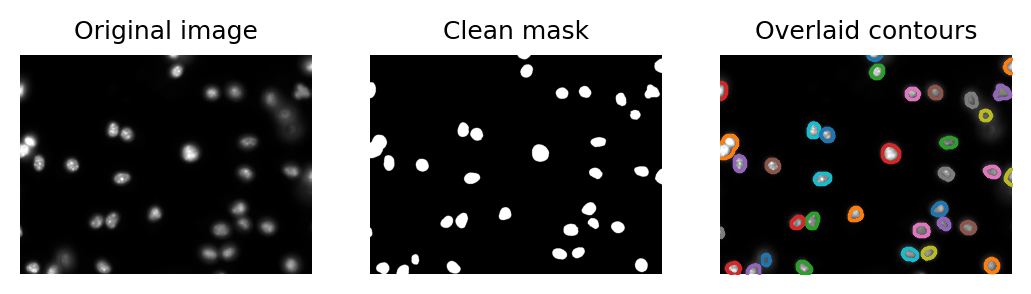

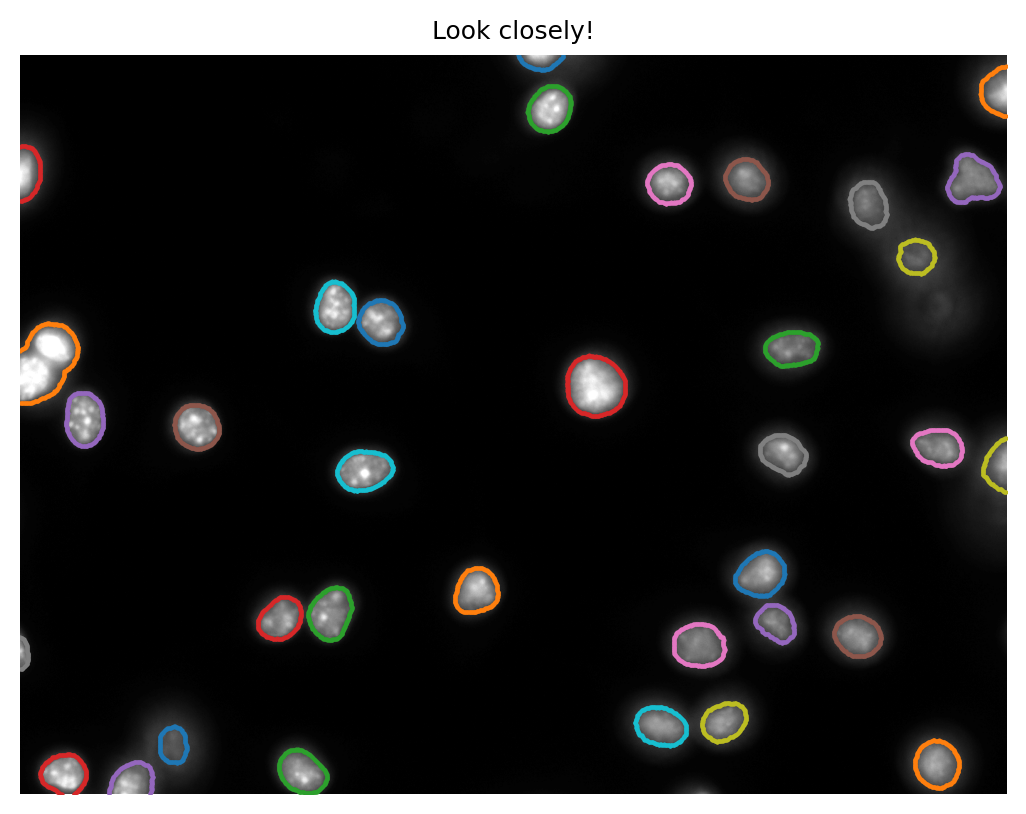

In [13]:
original_img = bbbc020_easy

# Threshold
thresh = skf.threshold_otsu(original_img)
mask_img = original_img > thresh

# Mathematical morphology
disk_size = 5
structuring_element = sku.disk(disk_size)
clean_mask = sku.binary_opening(mask_img, structuring_element)

# Extract contours
contours = skm.find_contours(clean_mask, level=0)

# Visualize the result
fig, axes = plt.subplots(nrows=1, ncols=3)

axes[0].imshow(original_img, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original image', fontsize=9)

axes[1].imshow(clean_mask, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Clean mask', fontsize=9)

axes[2].imshow(original_img, cmap='gray')
axes[2].axis('off')
axes[2].set_title('Overlaid contours', fontsize=9)

for c in contours:
    axes[2].scatter(c[:,1],c[:,0], s=.1, marker='.')

plt.show()

# If disk_size is set to a too large value, some objects start to disappear as they get "erased".
# Try out with disk_size=30!
plt.imshow(original_img, cmap='gray')
plt.axis('off')
plt.title('Look closely!', fontsize=9)

for c in contours:
    plt.scatter(c[:,1],c[:,0], s=1, marker='.')

plt.show()

**3.4** Combining the methods we looked at so far, try to instance-segment the BBBC010 image. 

*Hint: remember that the image background can be subtracted by making use of Gaussian filtering, as seen in notebook 1 - Handling Image Data!*

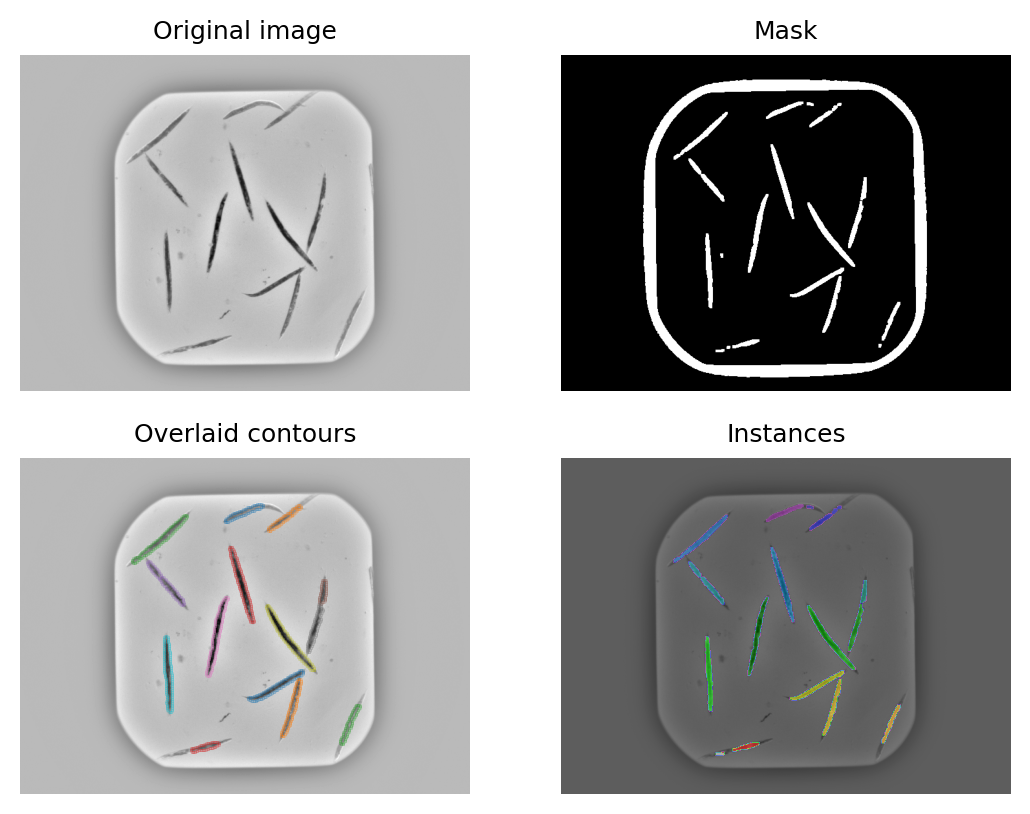

In [14]:
original_img = bbbc010_easy

# Background subtraction (see 2.4 in notebook 1)
filtered_img = skf.gaussian(original_img, sigma=20)
diff_img = original_img - filtered_img

# Thresholding
thresh = skf.threshold_otsu(diff_img)
# Here the objects are dark on a bright background, so the foreground is whatever is smaller than the threshold!
mask_img = diff_img < thresh 

# Mathematical morphology
disk_size = 2.5
structuring_element = sku.disk(disk_size)
clean_mask = sku.binary_opening(mask_img, structuring_element)

# Save this semantic mask for later
bbbc010_easy_sem_mask = clean_mask

# Contour extraction
contours = np.array(skm.find_contours(clean_mask, level=0), dtype=object)

# Some spurious objects can be removed by setting a threshold on what is a valid size
lengths = [len(c) for c in contours]

max_size = 500
min_size = 50
valid = [i for i in range(len(lengths)) if ((lengths[i]<max_size) and (lengths[i]>min_size))]

contours = contours[valid]

# Connected component labeling
instance_labels = skm.label(clean_mask, background=0, connectivity=2)

# The label map can be cleaned up based on size, similarly to the contours above
areas = [np.sum(instance_labels== l) for l in np.unique(instance_labels)]

max_size = 5000
min_size = 50
invalid = [i for i in range(len(areas)) if ((areas[i]>max_size) or (areas[i]<min_size))]

for i in invalid:
    instance_labels[instance_labels == i] = 0
    
# Save this instance mask for later
bbbc010_easy_inst_mask = instance_labels

# Visualize the result
fig, axes = plt.subplots(nrows=2, ncols=2)

axes[0,0].imshow(diff_img, cmap='gray')
axes[0,0].axis('off')
axes[0,0].set_title('Original image', fontsize=9)

axes[0,1].imshow(clean_mask, cmap='gray')
axes[0,1].axis('off')
axes[0,1].set_title('Mask', fontsize=9)

axes[1,0].imshow(diff_img, cmap='gray')
axes[1,0].axis('off')
axes[1,0].set_title('Overlaid contours', fontsize=9)

for c in contours:
    axes[1,0].scatter(c[:,1],c[:,0], s=.01, marker='.')
    
axes[1,1].imshow(diff_img, cmap='gray')
axes[1,1].imshow(instance_labels, cmap='nipy_spectral', alpha=.5)
axes[1,1].axis('off')
axes[1,1].set_title('Instances', fontsize=9)

plt.show()

## 4. Evaluating segmentation quality

Now that we are able to produce semantic and instance segmentation masks, we may rightfully ask ourselves how good they are. Here, we will look at classical metrics that allow evaluating the quality of a segmentation in a quantitative manner.

**4.1** In order to evaluate segmentation quality, we need a reference of what the "perfect" result would look like. This is referred to as a *ground truth*, and is generally obtained through manual curation. Run the lines below to load the semantic ground truth masks corresponding to the images we are working with.

In [15]:
# BBBC010
bbbc010_easy_sem_gt = imageio.imread('data/Part 2/BBBC010/easier_semantic_ground_truth.tif')
bbbc010_easy_sem_gt = (bbbc010_easy_sem_gt>0)
bbbc010_hard_sem_gt = imageio.imread('data/Part 2/BBBC010/harder_semantic_ground_truth.tif')
bbbc010_hard_sem_gt = (bbbc010_hard_sem_gt>0)

# BBBC020
bbbc020_easy_sem_gt = imageio.imread('data/Part 2/BBBC020/easier_semantic_ground_truth.tif')
bbbc020_easy_sem_gt = (bbbc020_easy_sem_gt>0)
bbbc020_hard_sem_gt = imageio.imread('data/Part 2/BBBC020/harder_semantic_ground_truth.tif')
bbbc020_hard_sem_gt = (bbbc020_hard_sem_gt>0)

**4.2** Adapting what you learned in Part 3, vizualize the semantic ground truth masks overlaid on top of the original images.

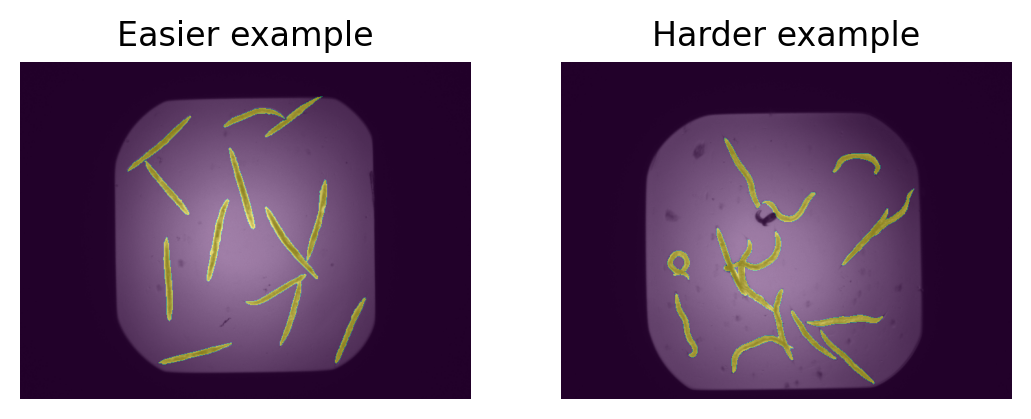

In [16]:
# BBBC010
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(bbbc010_easy, cmap='gray')
axes[0].imshow(bbbc010_easy_sem_gt, alpha=.5)
axes[0].axis('off')
axes[0].set_title('Easier example')

axes[1].imshow(bbbc010_hard, cmap='gray')
axes[1].imshow(bbbc010_hard_sem_gt, alpha=.5)
axes[1].axis('off')
axes[1].set_title('Harder example')

plt.show()

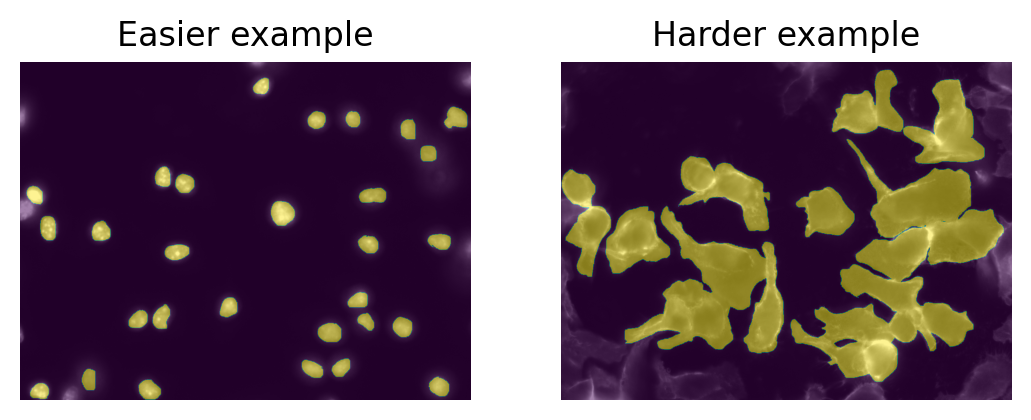

In [17]:
# BBBC020
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(bbbc020_easy, cmap='gray')
axes[0].imshow(bbbc020_easy_sem_gt, alpha=.5)
axes[0].axis('off')
axes[0].set_title('Easier example')

axes[1].imshow(bbbc020_hard, cmap='gray')
axes[1].imshow(bbbc020_hard_sem_gt, alpha=.5)
axes[1].axis('off')
axes[1].set_title('Harder example')

plt.show()

**4.3** The Intersection-over-Union (IoU) and Dice scores are two commonly-used semantic segmentation metrics ranging between 0 and 1, with higher values corresponding to better results. Looking at their definition in the function below, can you intuitively understand what these metrics measure?

Using the instance_segmentation_metrics function, rank the segmentation masks you obtained in Part 3 based on the IoU and Dice scores. 

In [18]:
def instance_segmentation_metrics(mask_computed, mask_gt):
    # Intersection = logical AND
    overlap = mask_computed*mask_gt 
    # Union = logical OR
    union = mask_computed + mask_gt 

    IoU = overlap.sum()/float(union.sum())
    Dice = 2*overlap.sum()/(float(union.sum()+overlap.sum()))

    return (IoU, Dice)

In [19]:
(IoU, Dice) = instance_segmentation_metrics(bbbc010_easy_sem_mask, bbbc010_easy_sem_gt)

print("----- BBBC010 (easy) -----")
print("Intersection-over-Union score: "+str(IoU))
print("Dice score: "+str(Dice))

----- BBBC010 (easy) -----
Intersection-over-Union score: 0.2327856447951573
Dice score: 0.37765794204042263


In [20]:
(IoU, Dice) = instance_segmentation_metrics(bbbc020_easy_sem_mask, bbbc020_easy_sem_gt)

print("----- BBBC020 (easy) -----")
print("Intersection-over-Union score: "+str(IoU))
print("Dice score: "+str(Dice))

----- BBBC020 (easy) -----
Intersection-over-Union score: 0.72060997969363
Dice score: 0.8376215274793898


**4.4** In addition to a semantic ground truth, we can also define an instance-based ground truth. Run the lines below to load the instance ground truth masks corresponding to the images we are working with.

In [21]:
# BBBC010
bbbc010_easy_inst_gt = imageio.imread('data/Part 2/BBBC010/easier_instance_ground_truth.tif')
bbbc010_hard_inst_gt = imageio.imread('data/Part 2/BBBC010/harder_instance_ground_truth.tif')

# BBBC020
bbbc020_easy_inst_gt = imageio.imread('data/Part 2/BBBC020/easier_instance_ground_truth.tif')
bbbc020_hard_inst_gt = imageio.imread('data/Part 2/BBBC020/harder_instance_ground_truth.tif')

**4.5** Adapting what you learned in Part 3, vizualize the instance ground truth masks overlaid on top of the original images. 

An instance ground truth is usually provided as a set of images that each correspond to the segmentation mask of an individual object. Looking at the harder examples, can you guess why having an individual masks for each object may be beneficial?

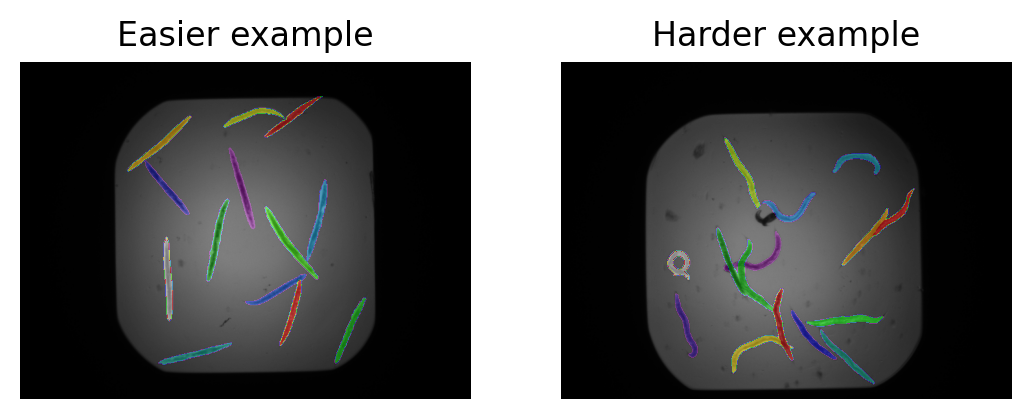

In [22]:
# BBBC010
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(bbbc010_easy, cmap='gray')
axes[0].imshow(bbbc010_easy_inst_gt, cmap='nipy_spectral', alpha=.5)
axes[0].axis('off')
axes[0].set_title('Easier example')

axes[1].imshow(bbbc010_hard, cmap='gray')
axes[1].imshow(bbbc010_hard_inst_gt, cmap='nipy_spectral', alpha=.5)
axes[1].axis('off')
axes[1].set_title('Harder example')

plt.show()

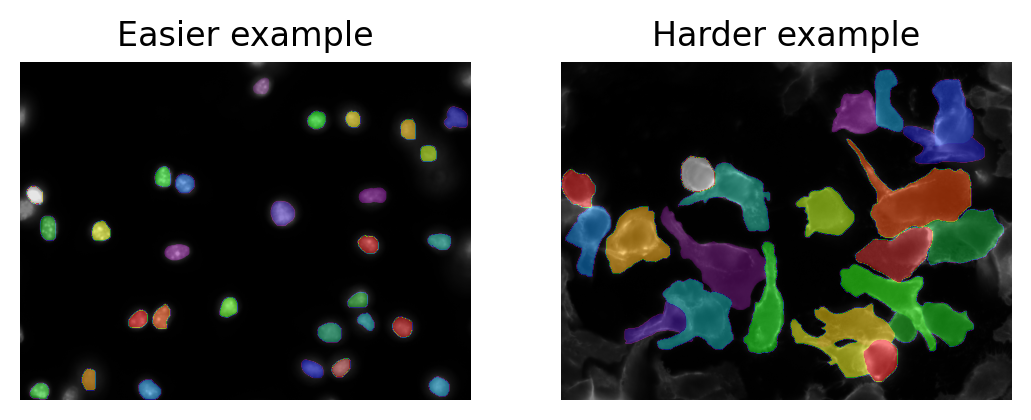

In [23]:
# BBBC020
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(bbbc020_easy, cmap='gray')
axes[0].imshow(bbbc020_easy_inst_gt, cmap='nipy_spectral', alpha=.5)
axes[0].axis('off')
axes[0].set_title('Easier example')

axes[1].imshow(bbbc020_hard, cmap='gray')
axes[1].imshow(bbbc020_hard_inst_gt, cmap='nipy_spectral', alpha=.5)
axes[1].axis('off')
axes[1].set_title('Harder example')

plt.show()

**4.6** Semantic segmentation metrics such as the IoU and Dice can also be used to assess the segmentation quality of individual instances. Additional metrics that can be useful to evaluate the performance of an instance segmentation result are those that assess the performance of detection. Precision and recall are such examples. Looking at their definition in the function below, can you intuitively understand what these metrics measure?

Using the semantic_segmentation_metrics function, rank the segmentation masks you obtained in Part 3 based on the precision and recall. 

In [24]:
def semantic_segmentation_metrics(mask_computed, mask_gt):
    # Recover instance labels
    instances_gt = np.unique(mask_gt)
    instances_gt = np.delete(instances_gt,0)

    instances_computed = np.unique(mask_computed)
    instances_computed  = np.delete(instances_computed ,0)
    
    # Recover overlaps 
    match = {}
    for i in instances_gt:
        mask_i = (mask_gt==i)
        
        for j in instances_computed:
            mask_j = (mask_computed==j)
            
            intersection = mask_i*mask_j
            overlap = intersection.sum()
            
            # Here we choose to pick the instance with the largest overlap as a match
            if overlap>0:
                if i in match:
                    if match[i][1]>overlap:
                        match[i]=[j,overlap]
                else:
                    match[i]=[j,overlap]
               
    matched_gt = [k for k in match.keys()]
    matched_computed = [v[0] for v in match.values()]
    
    # True positive = GT instances that overlap 
    TP = len(list(set(matched_gt) & set(instances_gt)))
    
    # False positive = computed instances that have no match in GT
    FP = len(instances_computed) - len(list(set(matched_computed) & set(instances_computed)))
    
    # False negative = GT instances that have no match in the computed mask
    FN = len(instances_gt) - len(list(set(matched_gt) & set(instances_gt)))

    precision = TP/(TP+FP)
    recall = TP/(TP+FN)

    return (precision, recall)

----- BBBC010 (easy) -----
Precision: 0.7647058823529411
Recall: 1.0


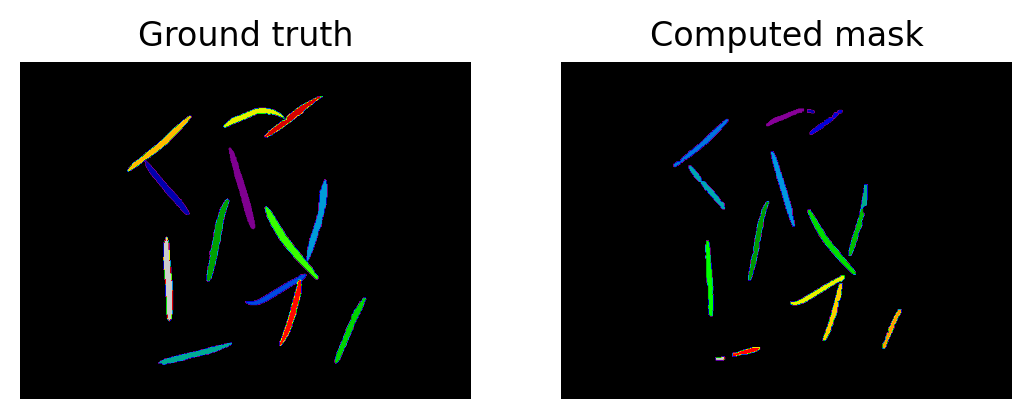

In [25]:
(precision, recall) = semantic_segmentation_metrics(bbbc010_easy_inst_mask, bbbc010_easy_inst_gt)

print("----- BBBC010 (easy) -----")
print("Precision: "+str(precision))
print("Recall: "+str(recall))

# Visualize the masks
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(bbbc010_easy_inst_gt, cmap='nipy_spectral')
axes[0].axis('off')
axes[0].set_title('Ground truth')

axes[1].imshow(bbbc010_easy_inst_mask, cmap='nipy_spectral')
axes[1].axis('off')
axes[1].set_title('Computed mask')

plt.show()

----- BBBC020 (easy) -----
Precision: 0.5918367346938775
Recall: 1.0


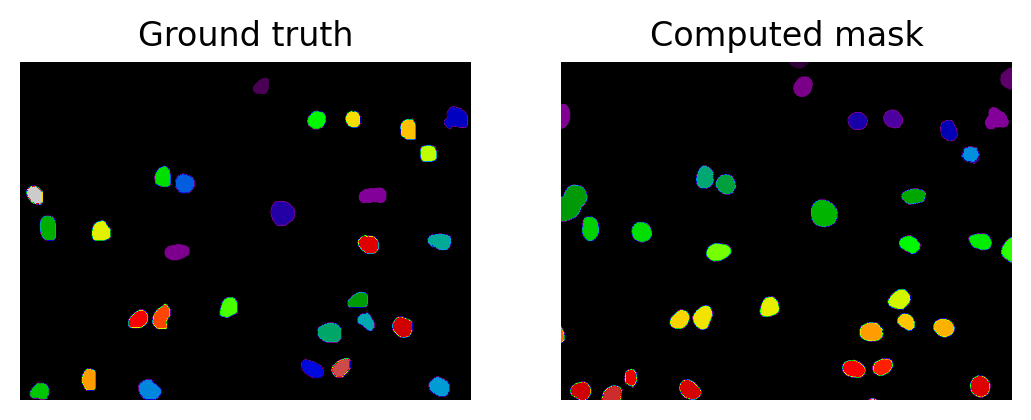

In [26]:
(precision, recall) = semantic_segmentation_metrics(bbbc020_easy_inst_mask, bbbc020_easy_inst_gt)

print("----- BBBC020 (easy) -----")
print("Precision: "+str(precision))
print("Recall: "+str(recall))

# Visualize the masks
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].imshow(bbbc020_easy_inst_gt, cmap='nipy_spectral')
axes[0].axis('off')
axes[0].set_title('Ground truth')

axes[1].imshow(bbbc020_easy_inst_mask, cmap='nipy_spectral')
axes[1].axis('off')
axes[1].set_title('Computed mask')

plt.show()

## BONUS. How well can you segment?

If you like challenges, apply everything you've seen up to now to try and segment the hard images. Report the quality of your result using the metrics above, and compare with your colleagues!

**5.1** Segment the hard example from BBBC010.

In [27]:
original_img = bbbc010_hard

# YOUR TURN!

**5.2** Segment the hard example from BBBC020.

In [28]:
original_img = bbbc020_hard

# YOUR TURN!